In [2]:
import numpy as np
import pandas as pd
import scipy.signal as scisignal
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from dtw import *

def stretch(arr, new_len):
     return [arr[int(i/new_len*len(arr))] for i in range(new_len)]

color = {
    "P1":'tab:blue',
    "P2":'tab:purple',
    "P3":'tab:orange',
    "P4":'tab:red'
}


In [3]:
yy_df = pd.read_json('data/yy_mutants.json')

## Find medoid of each protein

In [4]:
yy_df['dists'] = yy_df.run.apply(lambda x:[])

medoids = {}

for protein in yy_df.protein.unique():
    df = yy_df[yy_df.protein == protein]
    for _, row in df.iterrows():
        first = stretch(row.filtered_and_downsampled, 250)
        for _, row2 in df.iterrows():
            dtw_dist = dtw(first, 
                           stretch(row2.filtered_and_downsampled, 250)).distance
            df.at[_, 'dists'].append(
                dtw_dist
            )
    medoids[protein] = df.dists.apply(np.median).idxmin()
    print(protein, medoids[protein])

    

P2 79
P1 33
P3 60
P4 66


## Make T_{consensus}/synthetic medoid (i.e. basically a centroid) for each proteins

P2
P1
P3
P4
12
12
12
12


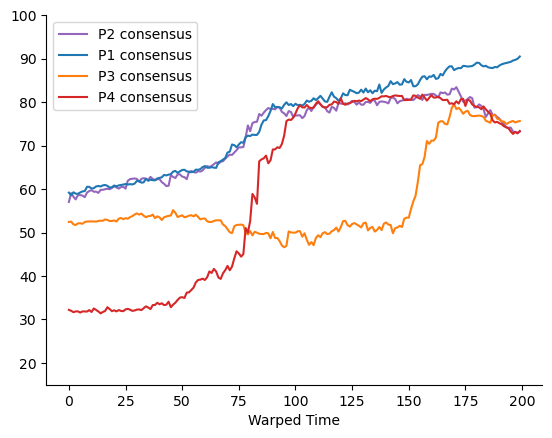

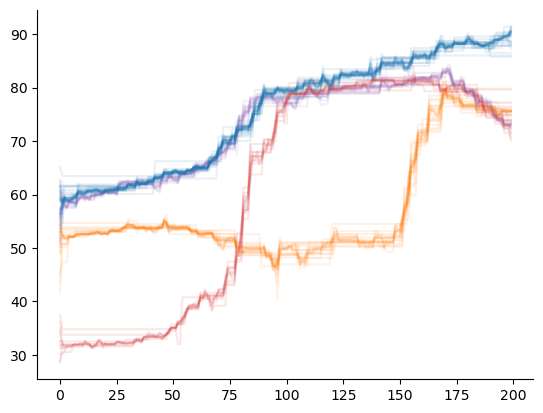

In [5]:
# Calculate synthetic medoids
synethetic_medoid = {}
len_orig = 200
for protein in yy_df.protein.unique():
    print(protein)
    tdf = yy_df[yy_df.protein == protein]
    matrix = np.zeros((len(tdf), len_orig))
    i = 0
    for _, row in tdf.iterrows():
        second = stretch(row.filtered_and_downsampled, len_orig)
        matrix[i] = second
        i += 1
    synethetic_medoid[protein] = np.median(matrix, axis=0)

# Plot centroids/t_{consesnuses}
for protein in yy_df.protein.unique():
    plt.plot(synethetic_medoid[protein], color = color[protein], label = f"{protein} consensus")
    print(len(tdf))
plt.ylim([15, 100])
plt.legend()
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.xlabel('Warped Time')
plt.show()


# Plot pile-ups
for protein in yy_df.protein.unique():
    tdf = yy_df[yy_df.protein == protein]
    for _, row in tdf[tdf.protein == protein].iterrows():
        other = row.filtered_and_downsampled
        result = dtw(synethetic_medoid[protein], other, step_pattern=symmetric2)
        idx_indices = [list(result.index1).index(i) for i in range(len(synethetic_medoid[protein]))]
        plt.plot([i for i in range(len(idx_indices))], 
                 [other[result.index2[i]] for i in idx_indices], 
                 color = color[protein], 
                 alpha=.1)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.show()
